In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [72]:
plt.style.use('ggplot') #setting plot style
pd.set_option('max_columns',30) #setting all columns to be displayed

**1. Importing Data**





Data was imported from file located on my Google Drive
*Data source: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata*

In [73]:
drive.mount('/content/drive') #mounting the drive for use and connecting to my drive account

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Airbnb_Open_Data.csv', index_col=0, low_memory=False)
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


**2. Data Exploration**

Reviewing the data, checking its shape, formats, columns

In [75]:
df.shape 

(102599, 25)

In [76]:
df.head(10)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN


In [77]:
df.columns #reviewing columns headers

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [78]:
df.dtypes #checking the types of the columns

NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                       

In [79]:
df.describe() #checking general statistics regarding the dataset

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


**3. Data Preparation**

*   Dropping irrelevant columns and rows
*   Identifying duplicated columns
*   Renaming columns
*   Managing null values








In [80]:
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [81]:
df.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Creating subset with columns we want to maintain [TO REVIEW AND REMOVE MORE - NOT USED]

In [82]:
df = df[['NAME', 
    #'host id', 
    'host_identity_verified', 'host name',
    #'neighbourhood group', 
    'neighbourhood', 'lat', 'long', 
    #'country','country code', 
    'instant_bookable', 'cancellation_policy', 'room type',
    'Construction year', 'price', 'service fee', 'minimum nights',
    'number of reviews', 'last review', 
    #'reviews per month',
    'review rate number', 
    #'calculated host listings count',
    #'availability 365', 'house_rules', 
    'license']].copy() #to create a brand new dataset and not only reference the old one

In [83]:
df = df.loc[:,['NAME', 
    #'host id', 
    'host_identity_verified', 'host name',
    #'neighbourhood group', 
    'neighbourhood', 'lat', 'long', 
    #'country','country code', 
    'instant_bookable', 'cancellation_policy', 'room type',
    'Construction year', 'price', 'service fee', 'minimum nights',
    'number of reviews', 'last review', 
    #'reviews per month',
    'review rate number', 
    #'calculated host listings count',
    #'availability 365', 'house_rules', 
    'license']]

In [84]:
df.head()

,NAME,host_identity_verified,host name,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,review rate number,license
id,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,4.0,NaN
1002102,Skylit Midtown Castle,verified,Jenna,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,4.0,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,5.0,NaN
1002755,NaN,unconfirmed,Garry,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.0,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,3.0,NaN


Correcting columns names


In [85]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood', 'lat',
       'long', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'review rate number', 'license'],
      dtype='object')

In [86]:
#correcting cases in column names
df.columns = df.columns.str.title()

In [87]:
df.columns

Index(['Name', 'Host_Identity_Verified', 'Host Name', 'Neighbourhood', 'Lat',
       'Long', 'Instant_Bookable', 'Cancellation_Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights',
       'Number Of Reviews', 'Last Review', 'Review Rate Number', 'License'],
      dtype='object')

In [88]:
df = df.rename(columns={'Host_Identity_Verified':'Host_Status', 'Review Rate Number':'Rate', 'Neighbourhood':'Location'})

In [89]:
df.columns = df.columns.str.replace(' ', '_') # replacing spaces with underscore

In [90]:
df.columns

Index(['Name', 'Host_Status', 'Host_Name', 'Location', 'Lat', 'Long',
       'Instant_Bookable', 'Cancellation_Policy', 'Room_Type',
       'Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights',
       'Number_Of_Reviews', 'Last_Review', 'Rate', 'License'],
      dtype='object')

Finding missing values

In [91]:
df.isna().sum() #sum of the number of null value per column

Name                      250
Host_Status               289
Host_Name                 406
Location                   16
Lat                         8
Long                        8
Instant_Bookable          105
Cancellation_Policy        76
Room_Type                   0
Construction_Year         214
Price                     247
Service_Fee               273
Minimum_Nights            409
Number_Of_Reviews         183
Last_Review             15893
Rate                      326
License                102597
dtype: int64

In [92]:
#dropping rows with null in column Name, Host_Name and Location - which are obligatory fields to allow users to find and book a place
df.dropna(axis='index', how='any', subset=['Name', 'Host_Name', 'Location'], inplace = True) 

In [93]:
#checking if there are no more null values in columns Name, Host_Name and Location
df.isna().sum()

Name                        0
Host_Status               276
Host_Name                   0
Location                    0
Lat                         8
Long                        8
Instant_Bookable           94
Cancellation_Policy        68
Room_Type                   0
Construction_Year         200
Price                     238
Service_Fee               268
Minimum_Nights            402
Number_Of_Reviews         182
Last_Review             15777
Rate                      314
License                101931
dtype: int64

Checking duplicates

In [94]:
df.duplicated().sum()

3926

In [95]:
df.loc[df.duplicated()]

,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
id,,,,,,,,,,,,,,,,,
39218839,Cute east village apartment.,verified,Martis,East Village,40.73111,-73.98528,True,flexible,Entire home/apt,2010.0,$208,$42,14.0,1.0,5/31/2016,2.0,NaN
39225467,2BR Lux Prospect Heights,verified,Supriya,Crown Heights,40.67640,-73.96218,True,moderate,Entire home/apt,2019.0,$76,$15,28.0,5.0,10/6/2015,1.0,NaN
39229885,Spacious & Sunny in Prime Brooklyn,verified,David,Clinton Hill,40.68472,-73.96691,False,moderate,Entire home/apt,2015.0,"$1,013",$203,20.0,89.0,6/28/2019,3.0,NaN
39230437,1 Bedroom Apt - Close to JFK & City,unconfirmed,Terrance,East New York,40.65408,-73.87883,False,strict,Entire home/apt,2004.0,$795,$159,4.0,40.0,6/17/2019,3.0,NaN
39242036,"Great 1 BR Apt in Kips Bay, NY",unconfirmed,Mark,Kips Bay,40.73903,-73.97975,True,moderate,Private room,2020.0,"$1,069",$214,1.0,1.0,8/21/2014,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092437,Spare room in Williamsburg,verified,Krik,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,3.0,NaN
6092990,Best Location near Columbia U,unconfirmed,Mifan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,2.0,NaN
6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,5.0,NaN


In [96]:
#removing duplicated rows
df.drop_duplicates(inplace=True)

In [97]:
df.shape

(98007, 17)

In [98]:
#checking the duplicates on Name, Host_Name and Location
df.duplicated(subset=['Name', 'Host_Name', 'Location']).sum()

35074

In [99]:
df.loc[df.duplicated(subset=['Name', 'Host_Name', 'Location'])]

,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
id,,,,,,,,,,,,,,,,,
1459745,Loft Suite @ The Box House Hotel,unconfirmed,Warren,Greenpoint,40.73890,-73.95395,True,moderate,Entire home/apt,2015.0,"$1,186",$237,3.0,75.0,6/5/2019,5.0,NaN
1608314,Large Room w/ Private Entrance,verified,Jacques,Bedford-Stuyvesant,40.68905,-73.95410,True,flexible,Private room,2003.0,$170,$34,7.0,2.0,5/5/2022,5.0,NaN
2417986,Spacious Loft 5 min to Union Square,unconfirmed,Alex,Williamsburg,40.71571,-73.95813,False,moderate,Private room,2017.0,$336,$67,1.0,115.0,5/21/2019,1.0,NaN
3897597,west village 1BR!best value!,unconfirmed,Host,West Village,40.73254,-74.00698,False,moderate,Entire home/apt,2011.0,"$1,037",$207,30.0,12.0,8/12/2018,4.0,NaN
4262115,Luminous Modern Apt Share for Young Professionals,verified,Ollie,Bedford-Stuyvesant,40.68531,-73.95185,True,flexible,Private room,2008.0,"$1,170",$234,30.0,44.0,5/19/2019,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57365208,Cozy bright room near Prospect Park,unconfirmed,Mariam,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019,5.0,NaN
57365760,Private Bedroom with Amazing Rooftop View,verified,Trey,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,3.0,NaN
57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019,4.0,NaN


In [100]:
#checking the examples of entries with duplicated names
df.query('Name == "Large Room w/ Private Entrance"')

,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
id,,,,,,,,,,,,,,,,,
1597820,Large Room w/ Private Entrance,verified,Jacques,Bedford-Stuyvesant,40.68881,-73.95405,True,flexible,Private room,2003.0,$589,$118,21.0,6.0,11/1/2013,4.0,NaN
1608314,Large Room w/ Private Entrance,verified,Jacques,Bedford-Stuyvesant,40.68905,-73.95410,True,flexible,Private room,2003.0,$170,$34,7.0,2.0,5/5/2022,5.0,NaN
39251425,Large Room w/ Private Entrance,unconfirmed,Jacques,Bedford-Stuyvesant,40.68881,-73.95405,True,strict,Private room,2003.0,$589,$118,21.0,6.0,11/1/2013,4.0,NaN
39261919,Large Room w/ Private Entrance,unconfirmed,Jacques,Bedford-Stuyvesant,40.68905,-73.95410,False,strict,Private room,2003.0,$170,$34,7.0,2.0,5/5/2022,5.0,NaN


In [101]:
#removing duplicated values on 3 columns: Name, Host_Name and Neighbourhood
df = df.loc[~df.duplicated(subset=['Name', 'Host_Name', 'Location'])] 

In [102]:
#double checking the duplicates:
df.duplicated(subset=['Name', 'Host_Name', 'Location']).sum()

0

In [103]:
# as we were dropping the rows - we can reset the index:
df.reset_index(drop=True, inplace=True) #drop True to remove the exisitng index

In [104]:
df.shape #checking shape after changes

(62933, 17)

In [105]:
df.dtypes

Name                    object
Host_Status             object
Host_Name               object
Location                object
Lat                    float64
Long                   float64
Instant_Bookable        object
Cancellation_Policy     object
Room_Type               object
Construction_Year      float64
Price                   object
Service_Fee             object
Minimum_Nights         float64
Number_Of_Reviews      float64
Last_Review             object
Rate                   float64
License                 object
dtype: object

In [106]:
# changing column Construction year from float to int 
df['Construction_Year'] = df['Construction_Year'].astype('Int64')

In [107]:
#changing column Minimum Nights
df['Minimum_Nights'] = df['Minimum_Nights'].astype('Int64')

In [108]:
df['Minimum_Nights'].value_counts().sort_index()

-1223    1
-365     1
-200     1
-12      1
-10      2
        ..
 999     3
 1250    1
 2645    1
 3455    1
 5645    1
Name: Minimum_Nights, Length: 144, dtype: Int64

In [109]:
#setting the limits on minimum nights - from 0 to 30, all values below 0 are set to 0, all values above 30 are set to 30
df['Minimum_Nights'].loc[df['Minimum_Nights'] <0] = 0 
df['Minimum_Nights'].loc[df['Minimum_Nights'] > 30] = 30

In [110]:
df['Price'].value_counts()

$206       76
$346       75
$1,056     75
$408       74
$406       74
           ..
$864       37
$187       37
$786       35
$810       35
$877       35
Name: Price, Length: 1151, dtype: int64

In [111]:
df['Price']=df['Price'].replace("^\$",'', regex=True)

In [112]:
df['Price'].replace('\s+$', '', regex=True, inplace=True)

In [114]:
df['Price'].replace(',', '', regex=True, inplace=True)

In [115]:
df['Price'] = df['Price'].astype(float)

Column last review is a float - we want to change it into datetime

In [116]:
df['Last_Review']

0        10/19/2021
1         5/21/2022
2               NaN
3        11/19/2018
4         6/22/2019
            ...    
62928      1/1/2019
62929     5/27/2019
62930      7/1/2019
62931     5/24/2019
62932     6/13/2019
Name: Last_Review, Length: 62933, dtype: object

In [117]:
pd.to_datetime(df['Last_Review'])

0       2021-10-19
1       2022-05-21
2              NaT
3       2018-11-19
4       2019-06-22
           ...    
62928   2019-01-01
62929   2019-05-27
62930   2019-07-01
62931   2019-05-24
62932   2019-06-13
Name: Last_Review, Length: 62933, dtype: datetime64[ns]

In [118]:
df['Last_Review'] = pd.to_datetime(df['Last_Review'])

In [119]:
df.dtypes

Name                           object
Host_Status                    object
Host_Name                      object
Location                       object
Lat                           float64
Long                          float64
Instant_Bookable               object
Cancellation_Policy            object
Room_Type                      object
Construction_Year               Int64
Price                         float64
Service_Fee                    object
Minimum_Nights                  Int64
Number_Of_Reviews             float64
Last_Review            datetime64[ns]
Rate                          float64
License                        object
dtype: object

**4. Feature understanding**

In [120]:
df


,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,$193,10,9.0,2021-10-19,4.0,NaN
1,Skylit Midtown Castle,verified,Jenna,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,$28,30,45.0,2022-05-21,4.0,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620.0,$124,3,0.0,NaT,5.0,NaN
3,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,$41,10,9.0,2018-11-19,3.0,NaN
4,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,$115,3,74.0,2019-06-22,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62928,New! 3B2B Bayside/3 blocks to train/25 min to NYC,verified,Sara,Bayside,40.76039,-73.77419,False,strict,Entire home/apt,2011,759.0,$152,3,1.0,2019-01-01,4.0,NaN
62929,Cozy 1bd in Kensington,verified,Alena,Kensington,40.64046,-73.97233,False,flexible,Entire home/apt,2015,93.0,$19,1,2.0,2019-05-27,5.0,NaN
62930,Elmhurst 1st Fl Rightl Bedroom,verified,Rafael,East Elmhurst,40.76294,-73.86883,True,flexible,Private room,2017,220.0,$44,1,17.0,2019-07-01,5.0,NaN
62931,Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony,unconfirmed,Rafael,East Elmhurst,40.76251,-73.86765,True,strict,Private room,2004,551.0,$110,1,17.0,2019-05-24,3.0,NaN


checkin unique values for columns: Host_Status, Instant_Bookable, Cancellation_Policy, Room_Type, Construction_Year, Rate, License

In [121]:
#checkin unique values for columns: Host_Status, Instant_Bookable, Cancellation_Policy, Room_Type, Construction_Year, Rate, License
df['Host_Status'].unique()


array(['unconfirmed', 'verified', nan], dtype=object)

In [122]:
df.loc[df['Host_Status'] == 'unconfirmed'] = np.nan


In [123]:
df['Host_Status'].unique()

array([nan, 'verified'], dtype=object)

In [124]:
df['Instant_Bookable'].unique()


array([nan, False, True], dtype=object)

In [125]:
df['Cancellation_Policy'].unique()


array([nan, 'moderate', 'flexible', 'strict'], dtype=object)

In [126]:
df['Room_Type'].unique()


array([nan, 'Entire home/apt', 'Private room', 'Shared room',
       'Hotel room'], dtype=object)

In [127]:
df['Construction_Year'].unique()


<IntegerArray>
[<NA>, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018, 2006, 2016,
 2017, 2021, 2003, 2011, 2012, 2020, 2014, 2022]
Length: 21, dtype: Int64

In [128]:
#changing 0 in Construction year to NAN
df.loc[df['Construction_Year'] == 0] = np.nan

In [129]:
df['Construction_Year'].unique()

<IntegerArray>
[<NA>, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018, 2006, 2016,
 2017, 2021, 2003, 2011, 2012, 2020, 2014, 2022]
Length: 21, dtype: Int64

In [130]:
df['Rate'].unique()


array([nan,  4.,  5.,  3.,  2.,  1.])

In [131]:
df['License'].unique()

array([nan, '41662/AL'], dtype=object)

In [132]:
df['License'].value_counts()

41662/AL    1
Name: License, dtype: int64

In [133]:
 df.head()

,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaT,NaN,NaN
1,Skylit Midtown Castle,verified,Jenna,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,$28,30,45.0,2022-05-21,4.0,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620.0,$124,3,0.0,NaT,5.0,NaN
3,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,$41,10,9.0,2018-11-19,3.0,NaN
4,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,$115,3,74.0,2019-06-22,3.0,NaN


In [134]:
#checking the year the buildings were constructed
df['Construction_Year'].value_counts()

2010    1627
2019    1620
2008    1610
2012    1607
2016    1607
2006    1594
2003    1593
2009    1591
2020    1581
2013    1573
2018    1571
2014    1570
2007    1570
2011    1565
2022    1560
2005    1545
2017    1532
2015    1530
2021    1523
2004    1515
Name: Construction_Year, dtype: Int64

In [141]:
df[df['Construction_Year'] < 2000] = np.nan

Text(0, 0.5, 'Apartments')

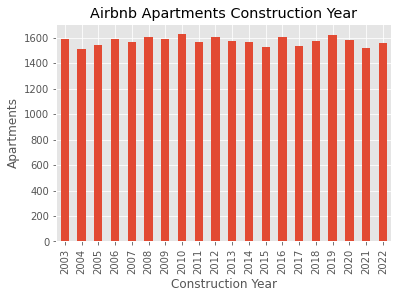

In [135]:
ax = df['Construction_Year'].value_counts().sort_index().plot(kind='bar', title = 'Airbnb Apartments Construction Year')
ax.set_xlabel('Construction Year')
ax.set_ylabel('Apartments')

In [136]:
df['Rate'].value_counts()

4.0    7281
5.0    7278
2.0    7238
3.0    7225
1.0    2436
Name: Rate, dtype: int64

Text(0.5, 0, 'Rate')

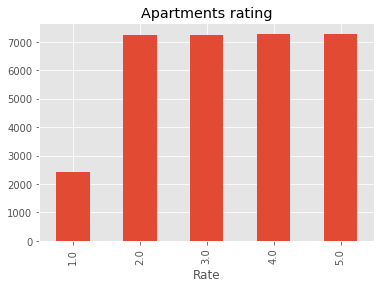

In [145]:
ax2 = df['Rate'].value_counts().sort_index().plot(kind='bar', title = 'Apartments rating')
ax2.set_xlabel('Rate')

Text(0.5, 0, 'Minimum Nights')

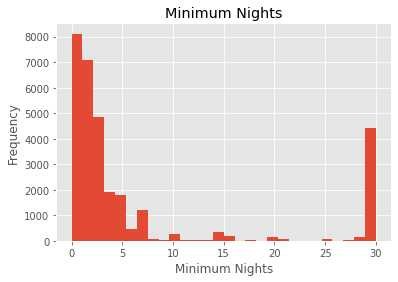

In [138]:
ax3 = df['Minimum_Nights'].plot(kind='hist', bins=28, title = 'Minimum Nights')
ax3.set_xlabel('Minimum Nights')

Text(0, 0.5, 'Amount of Apartments')

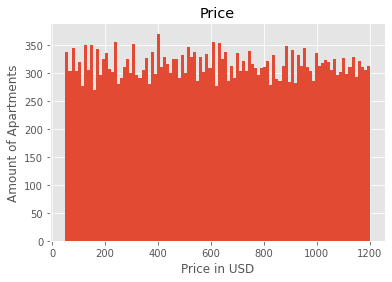

In [139]:
#density plot
ax3 = df['Price'].dropna().plot(kind='hist', bins=100, title = 'Price')
ax3.set_xlabel('Price in USD')
ax3.set_ylabel('Amount of Apartments')

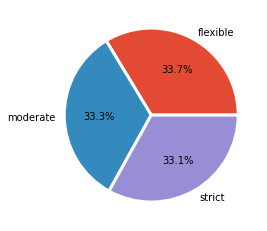

In [299]:
ax = df.groupby('Cancellation_Policy')['Name'].count().plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax.set_ylabel('')
plt.show()

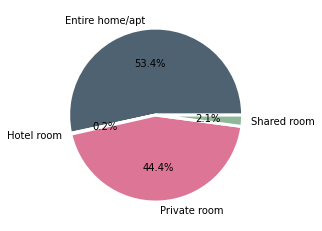

In [300]:
ax = df.groupby('Room_Type')['Name'].count().plot(kind='pie', autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
ax.set_ylabel('')
plt.show()

**5. Feature relationship**

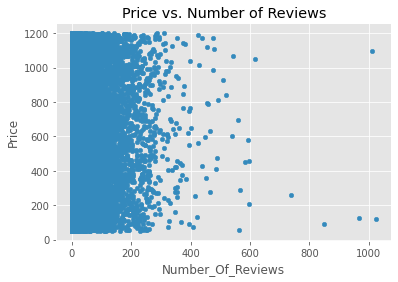

In [158]:
# Construction year vs Rating
df.plot(kind='scatter', x = 'Number_Of_Reviews', y = 'Price', title='Price vs. Number of Reviews')
plt.show()

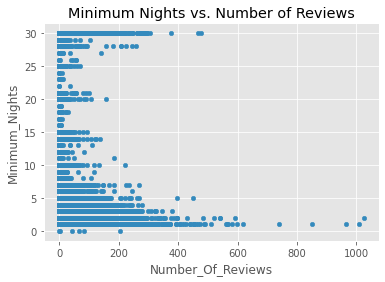

In [159]:
# Construction year vs Rating
df.plot(kind='scatter', x = 'Number_Of_Reviews', y = 'Minimum_Nights', title='Minimum Nights vs. Number of Reviews')
plt.show()

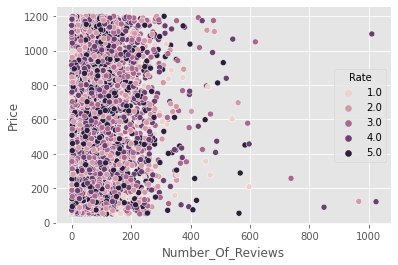

In [165]:
sns.scatterplot(x='Number_Of_Reviews', y='Price', hue='Rate', data=df)

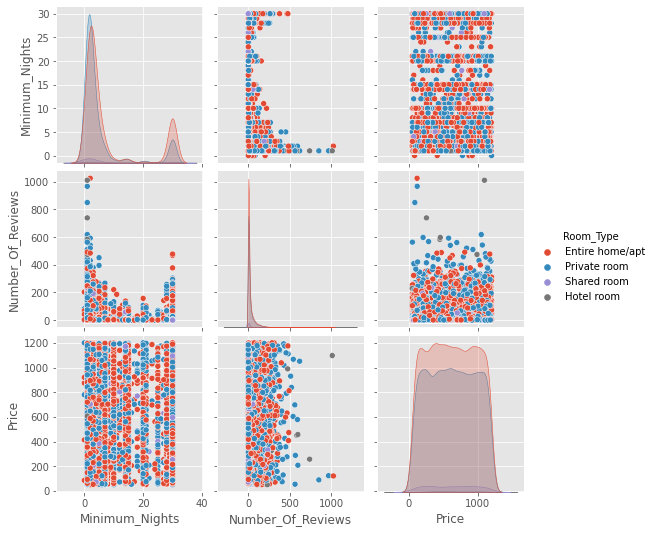

In [227]:
sns.pairplot(df,vars=['Minimum_Nights', 'Number_Of_Reviews', 'Price'], hue = 'Room_Type')
plt.show()

In [229]:
df_corr = df[['Minimum_Nights', 'Number_Of_Reviews', 'Price']].dropna().corr()
df_corr

,Minimum_Nights,Number_Of_Reviews,Price
Minimum_Nights,1.000000,-0.124915,-0.003385
Number_Of_Reviews,-0.124915,1.000000,0.000758
Price,-0.003385,0.000758,1.000000


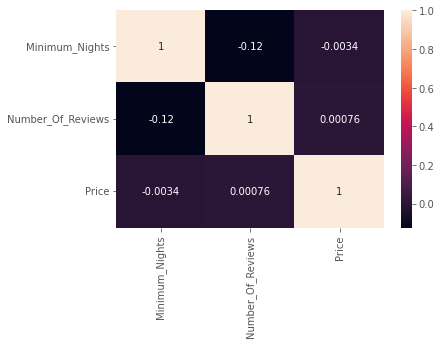

In [230]:
sns.heatmap(df_corr,annot=True)

In [146]:
df

,Name,Host_Status,Host_Name,Location,Lat,Long,Instant_Bookable,Cancellation_Policy,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Rate,License
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaT,NaN,NaN
1,Skylit Midtown Castle,verified,Jenna,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,$28,30,45.0,2022-05-21,4.0,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620.0,$124,3,0.0,NaT,5.0,NaN
3,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,$41,10,9.0,2018-11-19,3.0,NaN
4,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,$115,3,74.0,2019-06-22,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62928,New! 3B2B Bayside/3 blocks to train/25 min to NYC,verified,Sara,Bayside,40.76039,-73.77419,False,strict,Entire home/apt,2011,759.0,$152,3,1.0,2019-01-01,4.0,NaN
62929,Cozy 1bd in Kensington,verified,Alena,Kensington,40.64046,-73.97233,False,flexible,Entire home/apt,2015,93.0,$19,1,2.0,2019-05-27,5.0,NaN
62930,Elmhurst 1st Fl Rightl Bedroom,verified,Rafael,East Elmhurst,40.76294,-73.86883,True,flexible,Private room,2017,220.0,$44,1,17.0,2019-07-01,5.0,NaN
62931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaT,NaN,NaN


**7. Questions**

1. Which are the location with the cheapest/most expensive apartments?

In [174]:
df['Location'].value_counts()

Bedford-Stuyvesant    2403
Williamsburg          2351
Harlem                1674
Bushwick              1524
Hell's Kitchen        1325
                      ... 
New Dorp                 1
Fort Wadsworth           1
Lighthouse Hill          1
Westerleigh              1
Richmondtown             1
Name: Location, Length: 222, dtype: int64

In [183]:
df.groupby('Location')['Price'].mean().sort_values(ascending=False)

Location
New Dorp             1044.000000
Woodrow              1025.000000
Fort Wadsworth       1024.000000
Neponsit              977.000000
Midland Beach         898.285714
                        ...     
Oakwood               287.200000
Castleton Corners     285.600000
Howland Hook          215.000000
Richmondtown          176.000000
Lighthouse Hill       127.000000
Name: Price, Length: 222, dtype: float64

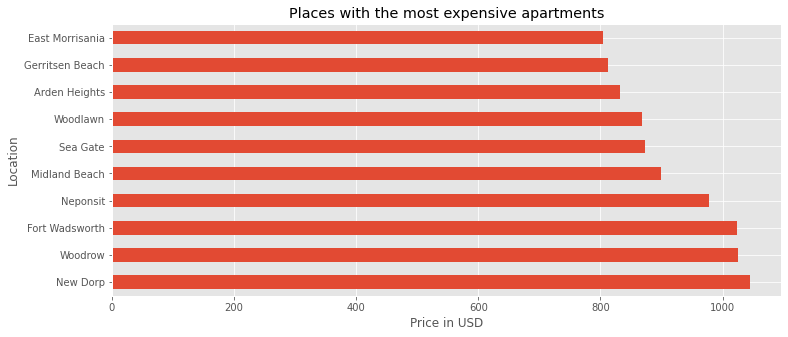

In [192]:
ax = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(12,5), title='Places with the most expensive apartments')
ax.set_xlabel('Price in USD')
plt.show()

2. Which hosts that have more than 100 flats, has the best rating?





In [218]:
df.query('Host_Name != "#NAME?"').groupby('Host_Name')['Rate'].agg(['mean','count']).sort_values(by='count', ascending=False).query('count>100')

,mean,count
Host_Name,,
Michael,3.295880,267
David,3.163793,232
John,3.272251,191
Alex,3.200000,185
Karen,3.227545,167
Sonder (NYC),3.591195,159
Daniel,3.370370,135
Maria,3.371212,132
Sarah,3.305344,131


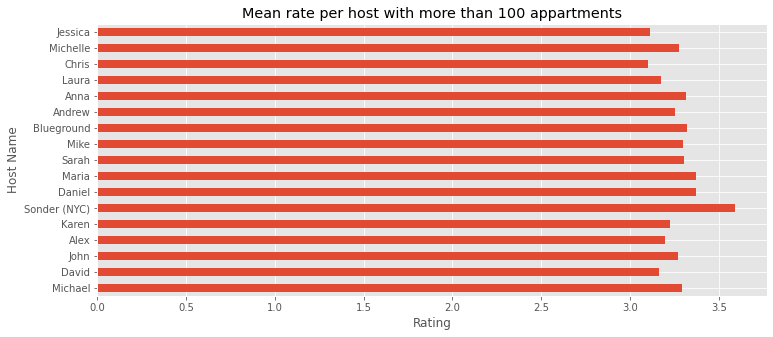

In [222]:
ax = df.query('Host_Name != "#NAME?"').groupby('Host_Name')['Rate'].agg(['mean','count']).sort_values(by='count', ascending=False).query('count>100')['mean'].plot(kind='barh', figsize=(12,5), title='Mean rate per host with more than 100 appartments')
ax.set_xlabel('Rating')
ax.set_ylabel('Host Name')
plt.show()

3. Which type of room is the cheapest?

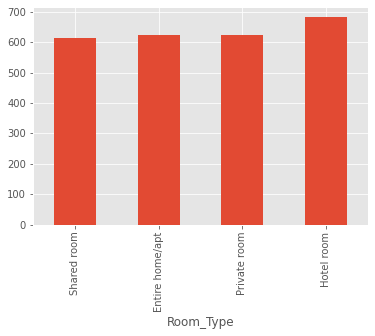

In [239]:
ax = df.groupby('Room_Type')['Price'].mean().sort_values().plot(kind='bar')


4. Are newest flats the most expensive?

In [292]:
df.groupby('Construction_Year')['Price'].mean()

Construction_Year
2003    625.180844
2004    620.670424
2005    617.603247
2006    631.248267
2007    623.321201
2008    632.581468
2009    610.965995
2010    627.205792
2011    632.961563
2012    615.668953
2013    615.359565
2014    635.410224
2015    622.204322
2016    617.078272
2017    632.461992
2018    619.190567
2019    615.170596
2020    616.017132
2021    617.982895
2022    633.019923
Name: Price, dtype: float64

In [285]:
ticks = list(df["Construction_Year"].unique().dropna())

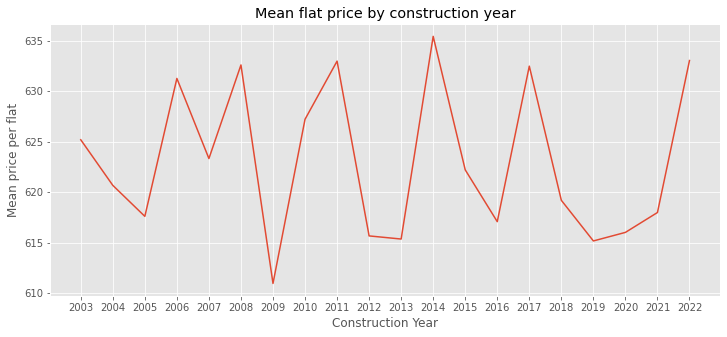

In [296]:
ax = df.groupby('Construction_Year')['Price'].mean().plot(kind='line',title='Mean flat price by construction year', figsize=(12,5), xticks=ticks)
ax.set_xlabel('Construction Year')
ax.set_ylabel('Mean price per flat')
ax.grid(True)